# Q1A

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv("fruits.csv")

In [154]:
data = np.array(data)

In [155]:
new_fruit = np.array([165, 5.5])

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

distances = []
for row in data:
    weight, sweetness, label = row
    dist_euclidean = euclidean_distance(new_fruit, np.array([weight, sweetness]))
    dist_manhattan = manhattan_distance(new_fruit, np.array([weight, sweetness]))
    dist_minkowski = minkowski_distance(new_fruit, np.array([weight, sweetness]), p=3)
    distances.append((dist_euclidean, dist_manhattan, dist_minkowski, label))
print(distances)
k = 3
neighbors = sorted(distances, key=lambda x: x[0])[:k]

labels = [neighbor[3] for neighbor in neighbors]
predicted_label = max(set(labels), key=labels.count)

print(f"\nPredicted Label for the new fruit: {predicted_label}")

[(15.074813431681335, 16.5, 15.00499833425864, 'Apple'), (35.00357124637428, 35.5, 35.00003401357238, 'Apple'), (15.074813431681335, 16.5, 15.00499833425864, 'Orange'), (5.024937810560445, 5.5, 5.001666111419547, 'Orange'), (5.024937810560445, 5.5, 5.001666111419547, 'Apple'), (25.124689052802225, 27.5, 25.008330557097732, 'Orange')]

Predicted Label for the new fruit: Apple


In [156]:
for k in [1, 5]:
    neighbors = sorted(distances, key=lambda x: x[0])[:k]
    labels = [neighbor[3] for neighbor in neighbors]
    predicted_label = max(set(labels), key=labels.count)
    print(f"Predicted Label for k={k}: {predicted_label}")

Predicted Label for k=1: Orange
Predicted Label for k=5: Orange


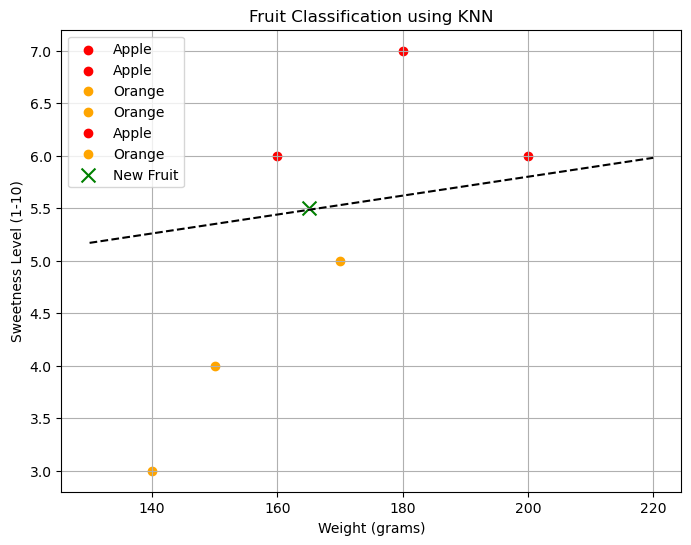

In [190]:
# Define the slope and intercept for the decision boundary
slope = .009
intercept = 4

# Generate x values for the decision boundary based on the data limits
x_values = np.linspace(x_min, x_max, 100)
y_values = slope * x_values + intercept  # y = mx + b

# Existing plotting code
colors = {'Apple': 'red', 'Orange': 'orange'}

plt.figure(figsize=(8, 6))

# Scatter plot for existing data points
for row in data:
    weight, sweetness, label = row[:3]
    plt.scatter(weight, sweetness, color=colors[label], label=label)

# Scatter plot for the new fruit
plt.scatter(new_fruit[0], new_fruit[1], color='green', marker='x', s=100, label='New Fruit')

plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')
plt.title('Fruit Classification using KNN')
plt.legend()
plt.grid()

# Prepare contour plot data (optional)
x_min, x_max = 130, 220
y_min, y_max = 1, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))

Z = []
for (x1, y1) in zip(xx.ravel(), yy.ravel()):
    point = np.array([x1, y1])
    distances = []
    for row in data:
        weight, sweetness, label = row[:3]
        dist = euclidean_distance(point, np.array([weight, sweetness], dtype=float))
        distances.append((dist, label))
    neighbors = sorted(distances, key=lambda x: x[0])[:k]
    labels = [neighbor[1] for neighbor in neighbors]
    Z.append(max(set(labels), key=labels.count))

Z = np.array(Z).reshape(xx.shape)
Z_color = np.where(Z == 'Apple', 1, 0)

# Uncomment if you want to show the contour regions
# plt.contourf(xx, yy, Z_color, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the decision boundary without limiting y-values
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

# Show the plot
plt.show()


# Q1B

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

In [193]:
data = pd.read_csv("fruits.csv")
df = pd.DataFrame(data)
new_fruit = np.array([[165,5.5]])
X = df[['weight', 'sweetness']].values
y = df['label'].values

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

predicted_label = knn.predict(new_fruit)
print(f"Predicted Label for the new fruit: {predicted_label[0]}")

distances = pairwise_distances(new_fruit, X, metric='euclidean')[0]
print("Euclidean distances:\n", distances)

distances_manhattan = pairwise_distances(new_fruit, X, metric='manhattan')[0]
print("Manhattan distances:\n", distances_manhattan)

distances_minkowski = pairwise_distances(new_fruit, X, metric='minkowski', p=3)[0]
print("Minkowski distances:\n", distances_minkowski)

Predicted Label for the new fruit: Orange
Euclidean distances:
 [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan distances:
 [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski distances:
 [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


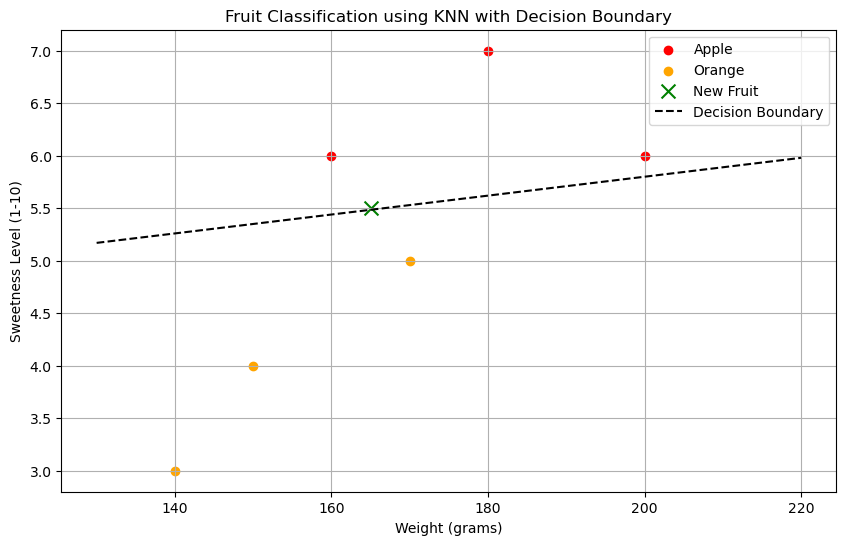

In [196]:
# Define the slope and intercept for the decision boundary
slope = .009
intercept = 4

# Generate x values for the decision boundary based on the data limits
x_values = np.linspace(130, 220, 100)  # You can adjust these limits if needed
y_values = slope * x_values + intercept  # y = mx + b

# Existing color mapping for labels
colors = {'Apple': 'red', 'Orange': 'orange'}

plt.figure(figsize=(10, 6))

# Scatter plot for each label
for label, color in colors.items():
    subset = df[df['label'] == label]
    plt.scatter(subset['weight'], subset['sweetness'], color=color, label=label)

# Scatter plot for the new fruit
plt.scatter(new_fruit[0][0], new_fruit[0][1], color='green', marker='x', s=100, label='New Fruit')

# Create meshgrid for contour plotting
x_min, x_max = 130, 220
y_min, y_max = 1, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))

# Predict the classifications for the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Map predictions to numeric values
Z_numeric = np.where(Z == 'Apple', 1, 0)  # Map 'Apple' to 1 and 'Orange' to 0
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot contour for decision regions
# plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the decision boundary without limiting y-values
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

# Set plot labels and title
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')
plt.title('Fruit Classification using KNN with Decision Boundary')
plt.legend()
plt.grid()
plt.show()


# Q2A

In [140]:
import numpy as np
import pandas as pd
from math import log2

# Sample Data
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    total = sum(counts)
    ent = -sum((count/total) * log2(count/total) for count in counts)
    return ent

diagnosis_entropy = entropy(df['Diagnosis'])
print(f"Entropy of Diagnosis: {diagnosis_entropy}")




Entropy of Diagnosis: 1.0


In [141]:
def information_gain(data, split_feature, target_col):
    total_entropy = entropy(data[target_col])
    values, counts = np.unique(data[split_feature], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(data[data[split_feature] == values[i]][target_col]) for i in range(len(values)))
    return total_entropy - weighted_entropy

features = ['Age', 'Blood Pressure', 'Cholesterol']
info_gains = {feature: information_gain(df, feature, 'Diagnosis') for feature in features}
print("Information Gain for each feature:", info_gains)

root_node = max(info_gains, key=info_gains.get)
print(f"Root Node for Decision Tree: {root_node}")

Information Gain for each feature: {'Age': 1.0, 'Blood Pressure': 1.0, 'Cholesterol': 1.0}
Root Node for Decision Tree: Age


In [142]:
class DecisionNode:
    def __init__(self, feature=None, value=None, left=None, right=None, leaf_value=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.leaf_value = leaf_value

def build_tree(data, target_col):
    if len(np.unique(data[target_col])) == 1:
        return DecisionNode(leaf_value=data[target_col].iloc[0])
    if len(data) == 0:
        return DecisionNode(leaf_value=None)

    best_feature = max(features, key=lambda feature: information_gain(data, feature, target_col))
    node = DecisionNode(feature=best_feature)

    values = np.unique(data[best_feature])
    for value in values:
        subset = data[data[best_feature] == value]
        node_value = build_tree(subset, target_col)
        if value in node.__dict__:
            node.left = node_value  
        else:
            node.right = node_value

    return node

sample = {'Age': 50, 'Blood Pressure_Low': 1, 'Cholesterol_Normal': 1}

tree = build_tree(df, 'Diagnosis')

def predict(node, sample):
    if node.leaf_value is not None:
        return node.leaf_value
    if sample[node.feature] == node.value:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

sample = {'Age': 50, 'Blood Pressure': 'Low', 'Cholesterol': 'Normal'}
prediction = predict(tree, sample)
print(f"Prediction for the patient: {prediction}")

Prediction for the patient: Sick


# Q2B

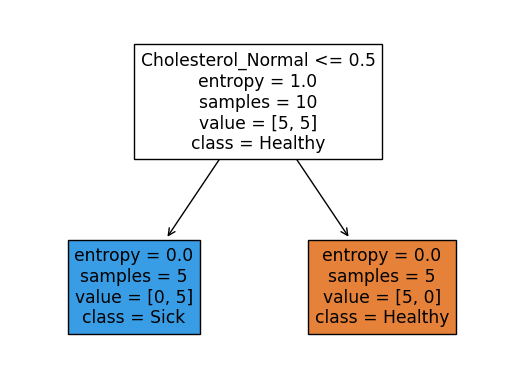

Prediction for the patient: Healthy


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

X = pd.get_dummies(X, drop_first=True)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

tree.plot_tree(clf, feature_names=X.columns, class_names=['Healthy', 'Sick'], filled=True)
plt.show()

sample = pd.DataFrame({'Age': [50], 'Blood Pressure_Low': [1], 'Cholesterol_Normal': [1]})
prediction = clf.predict(sample)
print(f"Prediction for the patient: {prediction[0]}")